# 01. Введение


Содержание:
- Машинное обучение
    - Что такое машинное обучение?
    - Что такое искусственный интеллект?
    - Представление данных
    - Переобучение и недообучение
    - Задачи и методы машинного обучения
- Теория вероятностей
    - Случайные события
    - Подсчёт комбинаций
    - Вероятность события
    - Формула полной вероятности
    - Дискретные и непрерывные случайные величины
    - Описательная статистика
- Линейная алгебра
    - Векторное пространство
    - Метрика
    - Матрицы
    - Определитель
- Ссылки

## Машинное обучение

Современный искусственный интеллект основывается на машинном обучении.

### Что такое машинное обучение?

Пусть 
- $X$ множество объектов;
- $Y$ множество ответов.

Мы хотим уметь для каждого объекта определять ответ.

#### Пример

Предположим, что у нас есть робот 🤖, которого мы хотим научить сортировать яблоки на спелые и на неспелые. В таком случае имеем: 
- $X$ множество яблок;
- $Y$ множество ответов, является ли яблоко спелым или нет: {'`спелый`', '`неспелый`'}.

Как можно решать такую задачу?

**Способ 1.**

Можно написать алгоритм для робота 🤖: `если` яблоко `имеет свойства` <...>, `то` оно спелое, `иначе` неспелое.

Алгоритм реализован _явным_ образом:
- Для входных данных можно выяснить, почему алгоритм сработал именно так. И можно изменить поведение алгоритма, если это нужно.

Предположим, что $X$ теперь не множество яблок, а множество разных фруктов. Задание то же, хотим уметь различать спелые фрукты от неспелых. Теперь доработать алгоритм будет сложнее. Возможно, придётся переписывать его полностью заново.

**Способ 2.**

Другой подход --- _машинное обучение_. Мы не реализуем алгоритм явно, а _обучаем_ робота 🤖, демонстрируя объекты и правильные ответы:
- 🍎 --- спелое яблоко,
- 🍏 --- неспелое яблоко.

Если потребуется задачу решить и для других фруктов, то добавим новые примеры:
- 🍐 --- спелый фрукт,
- 🍊 --- спелый фрукт.

Множество объектов и соответствующие ответ, которые мы демонстрируем, называется _обучающей выборкой_ --- мы их выбрали для _обучения_ нашего робота. Могли выбрать другие примеры.

Звучит хорошо, но возникает вопросы. Например,
- Как именно будет происходить обучение? Почему робот 🤖 обучится?
- Сколько фруктов надо показать? Когда обучение завершится? И может ли робот 🤖 ошибаться?

Для того, что бы продемонстрировать, что такое _обучение_, и как оно происходит, давайте разберём следующий пример.

#### Пример

Предположим, что мы хотим предсказывать, какую оценку получит ученик за контрольную работу, на основе того, сколько времени он к ней готовился. При этом у нас есть такие данные:

|      | часы подготовки | оценка за контрольную |
|------|-----------------|-----------------------|
| Саша | 1               | 2                     |
| Петя | 2               | 4                     |
| Дима | 3               | 5                     |
| Вася | 4               | 4                     |
| Рита | 5               | 5                     |


Нарисуем данные на плоскости. По вертикали --- оценка, по горизонтали --- часы подготовки.
(Для визуализации используем Python, но это пока не важно.)

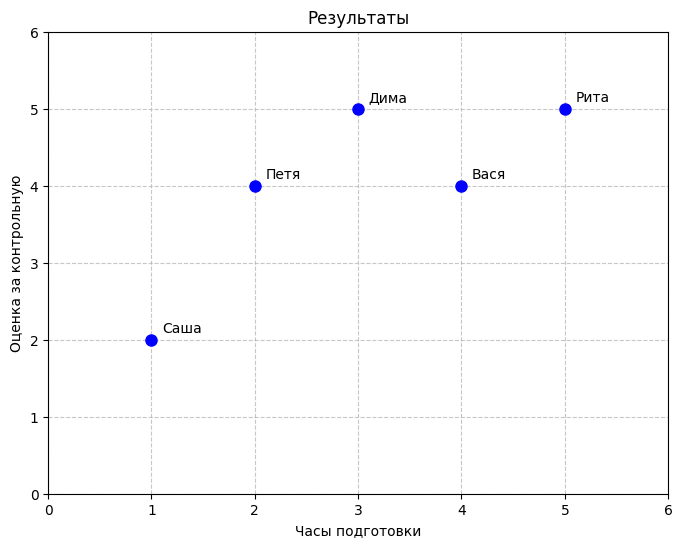

In [1]:
import matplotlib.pyplot as plt


# Данные
hours = [1, 2, 3, 4, 5]
grades = [2, 4, 5, 4, 5]
students = ['Саша', 'Петя', 'Дима', 'Вася', 'Рита']

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(hours, grades, 'bo', markersize=8)

# Подписи осей и заголовок
plt.xlabel('Часы подготовки')
plt.ylabel('Оценка за контрольную')
plt.title('Результаты')

# Добавление имен рядом с точками
for i, student in enumerate(students):
    plt.text(hours[i] + 0.1, grades[i] + 0.1, student)

# Сетка и ограничения осей
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 6)
plt.ylim(0, 6)

plt.show()

Видим, что есть _закономерность_ --- точки расположены не на одной прямой, но всё-таки вдоль некоторой линии.
Попробуем провести прямую, которая не сможет пройти через все точки, но будет находиться _максимально близко_ от них.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression


# Линейная регрессия
model = LinearRegression()
model.fit(np.array(hours).reshape(-1, 1), np.array(grades))

# Генерируем точки для гладкой линии
hours_smooth = np.linspace(0, 6, 100).reshape(-1, 1)
grades_smooth = model.predict(hours_smooth)

# Создание графика
plt.figure(figsize=(8, 6))

# Рисуем гладкую линию регрессии
plt.plot(hours_smooth, grades_smooth, 'r-', linewidth=2, 
         label=f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

# Рисуем исходные точки
plt.plot(hours, grades, 'bo', markersize=8)

# Добавляем вертикальные линии от точек до линии регрессии (ошибки)
hours_array = np.array(hours).reshape(-1, 1)
for i in range(len(hours)):
    pred_grade = model.predict(hours_array[i].reshape(-1, 1))[0]
    plt.plot([hours_array[i][0], hours_array[i][0]], [grades[i], pred_grade], 
             'gray', linestyle='--', alpha=0.7)

# Подписи осей и заголовок
plt.xlabel('Часы подготовки')
plt.ylabel('Оценка за контрольную')
plt.title('Линейная модель: оценка vs время подготовки')

# Добавление имен рядом с точками
for i, student in enumerate(students):
    plt.text(hours[i] + 0.1, grades[i] + 0.1, student)

# Сетка и ограничения осей
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.legend()

plt.tight_layout()
plt.show()

В итоге мы получили _линейную модель_  (красная прямая $y = 0.6x + 2.2$).
Это модель есть математическая форма закономерности, которую мы заметили выше (точки расположены вдоль линии). Модель позволяет прогнозировать оценку, в зависимости от часов подготовки.

Наша модель и есть обученный нами робот. Это робот умеет решать поставленную задачу.
Например, если потратить на обучение $4.5$ часа, то робот спрогнозирует, что оценка будет $y(x=4.5) = 0.6*4.5+2.2 = 4.9$.

На этом примере мы видим, что робот делает прогноз с погрешностью. Погрешность на наших данных не более одного балла.

Резюмируем.

**Машинное обучение (Machine Learning)** --- это подход решения задач, который использует алгоритмы, позволяющие компьютерам обучаться выполнять задачи, не будучи явно запрограммированными для каждой из них. В основе лежит идея о том, что системы могут извлекать закономерности из данных, принимать решения и улучшать свою производительность с опытом.

### Что такое искусственный интеллект?


**Искусственный интеллект (Artificial Intelligence, AI)** --- это область компьютерной науки, посвященная созданию систем и машин, способных выполнять задачи, которые обычно требуют человеческого интеллекта.

Машинное обучение --- это подраздел искусственного интеллекта.

Основные даты:

- 1943: **Модель искусственного нейрона** (У. МакКаллок и У. Питтс) --- первая математическая модель нейрона, заложившая основу для нейросетей.
- 1950: **Тест Тьюринга** (Алан Тьюринг) --- предложен критерий для оценки интеллекта машины.
- 1980-е: **Экспертные системы** — коммерческий бум систем, которые воспроизводили знания и логику специалистов в узких областях.
- 1997: **Deep Blue побеждает Каспарова** --- компьютер впервые обыграл чемпиона мира по шахматам.
- 2012: **AlexNet и начало бума глубокого обучения** --- победа сверточной нейросети в конкурсе ImageNet резко повысила точность распознавания образов.
- 2016: **AlphaGo побеждает в го** (DeepMind) --- программа победила чемпиона мира в игре го.
- 2017: **Трансформеры** (архитектура Transformer) --- предложена архитектура нейросетей для обработки последовательностей, лежащая в основе современных больших языковых моделей.
- 2018: **GPT и BERT** --- появление мощных языковых моделей, кардинально улучшивших понимание и генерацию естественного языка.
- 2022–2023: **Широкое распространение генеративного ИИ** --- запуск ChatGPT, Midjourney и других моделей, сделавших генеративный ИИ доступным для массового пользователя.

###  Представление данных

Для работы методов машинного обучения необходимо, чтобы объекты были представлены в виде чисел или последовательностей чисел.
Как правило числа в этих последовательностях --- это значения некоторого фиксированного набора признаков.
То есть последовательности признаков имеют фиксированную длину.
Говорят, что объект кодируется (или представляется) _вектором признаков_,
а длину этого вектора называют _размерностью_.

#### Пример

Предположим, что мы сортируем яблоки.
Возможны следующие признаки:
1. диаметр
2. вес
3. цвет, закодированный в числовом формате, например, [RGB](https://ru.wikipedia.org/wiki/RGB)

### Переобучение и недообучение

Предположим, что школьник готовился к контрольной.
1. Недообучение: школьник прочитал только краткое содержание всех тем. На контрольной не смогу решить ни одной задачки
2. Переобучение: школьник вызубрил решения задач, которые разбирались в классе и в учебнике. На контрольной идеально решил задачи, если они повторяли задачи, которые он видел ранее. Но не смог решить задачи, которые чуть-чуть отличались.

![](./res/01_learning.png)

#### Недообучение

Модель слишком простая, чтобы уловить закономерности в данных. Она не учится на тренировочных данных достаточно хорошо.
Например, пытаемся аппроксимировать все данные простой прямой линией, хотя реальная зависимость более сложная (например, параболическая).

Причины:
- Слишком простая модель (мало параметров).
- Очень мало признаков для описания объекта.

Признаки того, что есть недообучение:
- Высокая ошибка и на обучающих, и на новых данных.


#### Переобучение


Модель стала слишком сложная и подстроилась под тренировочные данные, включая их шум и случайные отклонения (выбросы).
Она "выучила" данные наизусть, вместо того чтобы понять общую закономерность.
Например, используем сложную полиномиальную кривую, которая проходит через каждую точку тренировочных данных.

Причины:
- Слишком сложная модель (много параметров).
- Очень мало данных для тренировки.

Признаки того, что есть переобучение:
- Очень низкая ошибка на обучающей выборке
- Очень высокая ошибка на новых данных 

### Задачи и методы машинного обучения

#### Обучение с учителем (Supervised Learning)

Хотим предсказывать целевую переменную (ответ) на основе входных данных (признаков).
Используется размеченный набор данных, где выходных данных указаны правильные ответы.

**Классификация** (предсказание категории/класса):
- Логистическая регрессия
- Метод опорных векторов (SVM)
- Деревья решений, случайный лес (Random Forest)
- Градиентный бустинг (Gradient Boosting) --- пооследовательное построение моделей (часто деревьев), где каждая следующая исправляет ошибки предыдущих (XGBoost, LightGBM, CatBoost)
- k-ближайших соседей (kNN)
- Нейронные сети (Neural Nets)

**Регрессия** (предсказание непрерывного числового значения):
- Линейная регрессия
- Деревья решений и ансамбли (случайный лес, градиентный бустинг)

#### Обучение без учителя (Unsupervised Learning)

Нет размеченнных данных, хотим найти скрытые структуры или закономерности

**Кластеризация** (разделение данных на группы или, кластеры, схожих объектов):
- K-средних (K-Means)
- Иерархическая кластеризаци ---древовидная структура кластеров

![](https://media.geeksforgeeks.org/wp-content/uploads/20250904105944868523/Clustering.webp)


**Снижение размерности** (уменьшение количества признаков, чтобы упростить данные, сохранив важную информацию):
- Метод главных компонент (PCA)
- t-SNE, UMAP

![](https://mlgstorageaccount.blob.core.windows.net/images/159E66FA76F02A1E4D4BF404BC601682.png)

#### Обучение с подкреплением (Reinforcement Learning)

Хотим научить агента действовать в окружающей среде, чтобы максимизировать награду. Агент учится методом проб и ошибок.

#### Глубокое обучение (Deep Learning)

Используются (глубокие) нейронные сети. Может применяться во всех вышеперечисленных категориях.

- Сверточные нейронные сети (CNN): задачи компьютерного зрения
- Рекуррентные нейронные сети (RNN) и LSTM/GRU: обработка последовательностей (распознавание речи, машинный перевод, анализ временных рядов)
- Трансформеры (Transformers): обработка естественного языка (NLP), лежит в основе моделей вроде GPT и BERT
- Автокодировщики (Autoencoders): нейросети для обучения без учителя, часто используемые для снижения размерности и шумоподавления
- Генеративные состязательные сети (GAN): генерация новых реалистичных данных (например, изображений)
- Диффузионные модели: генерация новых реалистичных данных (например, изображений)

## Теория вероятностей

### Случайные события

Рассмотрим события:

| событие | условие                | исход                         |
|---------|------------------------|-------------------------------|
| $A_1$   | Нагревание проволоки   | Длина проволоки увеличивается |
| $A_2$   | Бросание монеты        | Выпадает решка                |
| $A_3$   | Осмотр почтового ящика | Три письма                    |
| $A_4$   | Низкая температура     | Вода превращается в лёд       |

События $A_1$ и $A_4$ закономерны, $A_2$ и $A_3$ --- могут произойти, но могут и не произойти.

_Случайное событие_ --- это такой исход наблюдения или эксперимента, который может произойти, а может не произойти. 

_Пространство элементарных событий_ --- это полный список всех простейших, взаимно исключающих результатов случайного эксперимента. Это отправная точка для любого вероятностного рассуждения.

![](./res/01_dice.png)

_Достоверное_ событие --- это событие, которое в результате данного случайного эксперимента произойдет обязательно.

_Невозможное_ событие --- это событие, которое заведомо не произойдет в результате данного случайного эксперимента.

> **ВОПРОС**
> 
> Приведите примеры достоверных и невозможных событий?

_Пересечение_ событий A и B ($A \cap B$) --- это событие, которое происходит тогда и только тогда,
когда происходят ОБА события одновременно.

#### Пример

Кидаем игральный кубик.

- Событие A: "Выпало чётное число"
- Событие B: "Выпало число, большее 3"
- Пересечение A и B: "Выпало чётное число и больше 3" (4,6)

_Объединение_ событий A и B ($A \cup B$) --- это событие, которое происходит тогда, когда происходит любое из событий: либо A, либо B, либо они оба.

#### Примеры

Кидаем игральный кубик.

- Событие A: "Выпало чётное число"
- Событие B: "Выпало число, большее 3"
- Объединение A и B: "Выпало чётное число или больше 3" (2,4,5,6)

Если объединение событий A и B --- достоверное событие, а пересечение --- невозможное событие, то события A и B называются _противоположными_ ($A = \overline{B}$).

> Докажите, что $A \cap (\overline{B \cup C}) = (A \cap \overline{B}) \cap \overline{C}$.

_Диаграммы Венна_

![](https://support.microsoft.com/images/ru-ru/97a3d11c-7c48-4912-a11a-815c8cd220b5?format=avif&w=800)


### Подсчёт комбинаций

_Размещение без повторений_ из $n$ элементов по $m$ называются такие выборки, которые, имея по $m$ элементов, выбранных из числа данных $n$ элементов генеральной совокупности без повторений, отличаются одна от другой либо составом элементов, либо порядком из расположения.

$A^m_n = \frac{n!}{(n-m)!}$


_Перестановками без повторений_ из $n$ элементов называются размещения без повторений из $n$ элементов по $n$, то есть размещения, отличающиеся одно от другого только порядком расположения элементов.

$P_n = A^n_n = n!$

_Сочетаниями без повторений_ из $n$ элементов по $m$ называются такие размещения без повторений из $n$ элементов по $m$, которые отличаются хотябы одним элементом.

$C^m_n = \frac{n!}{m!(n-m)!}$

> На книжной полке плотно установлено $n$ книг. Сколькими способами можно будет взять с полки $k$ книг при условии, что ни разу не будут вынуты рядом стоящие книги?

### Вероятность события

_Равновозможные_ события --- это события, которые имеют одинаковый шанс произойти в результате случайного эксперимента.
Ни одно из равновозможных событий не является более предпочтительным или вероятным, чем другое.

_Вероятностью_ случайного события $H$ называется отношение числа $m$ равновозможных элементарных событий, благоприятствующих этому событию, к числу $n$ всех равновозможных элементарных событий пространства событий, определяемого данных испытанием.

$$P(H) = \frac{m}{n}$$


> - статистическое понятие вероятности события
> - геометрическое понятие вероятности

$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

### Фомула полной вероятности

_Условная вероятность_ --- это вероятность наступления одного события при условии, что другое событие уже произошло.
Проще говоря, мы пересчитываем шансы события A, учитывая новую информацию о том, что событие B уже случилось. Это сужает пространство наших исходов.

$$P(A \cap B) = P(B) * P(A|B)$$

#### Пример

В корзине 5 красных и 3 синих шара. Вынимают два шара подряд без возвращения. Какова вероятность, что оба шара красные?

1. Событие $A$: "Первый шар красный". $P(A) = 5/8$
2. Событие $B | A$: "Второй шар красный, при условии, что первый был красным" (в корзине осталось 4 красных и 3 синих). $P(B|A) = 4/7$
3. Событие $C$: "Оба шара красные". $P(C) = P(A) * P(B|A) = (5/8) * (4/7) = 20/56$

События называются _независимыми_ тогда и только тогда, когда имеет место равенство
$$P(A \cap B) = P(A)*P(B).$$

Что делать, если посчитать посчитать вероятность события $A$ сложно?

Идея: если мы можем разбить все пространство исходов на несколько непересекающихся сценариев (гипотез), то вероятность события $A$ будет складываться из его вероятностей в каждом из этих сценариев.

1. Пусть есть группа попарно несовместных событий $H_1, \ldots, H_n$.
2. Эти события образуют _полную группу событий_, то есть $P(H_1) + \ldots + P(H_n) = 1$.

Тогда

$$P(A) = P(H_1) * P(A|H_1) + \ldots + P(H_n) * P(A|H_n).$$

> - пример
> - теорема Байеса

### Дискретные и непрерывные случайные величины

Простое объяснение.

_Дискретная_ случайная величина --- это величина, которая принимает отдельные, изолированные значения, которые можно перечислить. Количество этих значений может быть конечным или бесконечным (как натуральные числа).

_Непрерывная_ случайная величина --- то величина, которая может принимать любое значение из некоторого интервала (конечного или бесконечного).

Дискретную случайную величину можно описать с помощью ряда распределения --- таблицы, где перечислены все возможные значения величины и соответствующие им вероятности.

Непрерывную случайную величину можно описать с помощью _функции плотности вероятности_, вероятность того, что величина попадет в интервал $(a, b)$ равна площади под кривой этой функции на данном интервале.

### Описательная статистика

#### Среднее значение (математическое ожидание)

Это средневзвешенное значение всех возможных значений случайной величины, где весами выступают их вероятности (центр массы распределения).

Для дискретной величины: если случайная величина $X$ принимает значения $x_1, x_2, ..., x_n$ с вероятностями $p_1, p_2, ..., p_n$, то её математическое ожидание $M[X]$ или $μ$ вычисляется как сумма
$$M[X] = \sum_{i=1}^{n} x_i \cdot p_i$$

Пример: среднее значение при броске кубика
$$M[X] = (1\cdot\frac{1}{6}) + (2\cdot\frac{1}{6}) + ... + (6\cdot\frac{1}{6}) = 3.5$$

> для непрерывной величины: суммирование заменяется интегрированием по всей области возможных значений, а вес задается функцией плотности вероятности


#### Медиана

Это значение, которое делит распределение пополам. Вероятность того, что случайная величина окажется меньше медианы, равна 50%, и вероятность того, что она окажется больше, также равна 50%.

В отличие от среднего, медиана устойчива к выбросам (очень большим или очень малым значениям). Например, если в комнату зайдет миллиардер, средний доход людей в комнате резко вырастет, а медианный --- почти не изменится.


#### Дисперсия

Дисперсия измеряет разброс значений случайной величины вокруг её среднего значения. Чем больше дисперсия, тем сильнее значения "разбросаны". Это средний квадрат отклонений от среднего.

Для дискретной величины:
$$ D(X) = M[(X - M(X))^2].$$

Стандартное отклонение: $\sigma = \sqrt{D(X)}$. Это более интерпретируемая величина, так как она измеряется в тех же единицах, что и сама величина $X$.

#### Ковариация

Ковариация измеряет степень линейной совместной изменчивости двух случайных величин. Она показывает, как одна величина изменяется относительно другой.

Ковариация между двумя величинами $X$ и $Y$ определяется как:
$$Cov(X, Y) = M[(X - M[X])(Y - M[Y])]$$

Интерпретация:
- $Cov(X, Y) > 0$: С ростом $X$ величина $Y$ имеет тенденцию к росту (прямая связь).
- $Cov(X, Y) < 0$: С ростом $X$ величина $Y$ имеет тенденцию к уменьшению (обратная связь).
- $Cov(X, Y) = 0$: Величины называются некоррелированными (линейная связь отсутствует).

## Линейная алгебра

###  Векторное пространство

_Векторное пространство_ (или _линейное пространство_) --- это набор объектов (которые мы называем _векторами_),
для которых определены операции сложения друг с другом и умножения на число (скаляр), и эти операции подчиняются определенным правилам.

Примеры:
- Множество всех векторов на плоскости.
- Множество всех векторов в трехмерном пространстве.
- Множество всех многочленов степени не выше $n$.

В простом случае (это наш случай) вектор размерности $n$ --- это список чисел длины $n$

#### Примеры

Допустим, мы описываем пиццу в приложении доставки. У каждой пиццы есть:

1. Цена (в рублях), например, 450
2. Вес (в граммах), например, 800
3. Рейтинг (от 1 до 5), например, 4.7
4. Время приготовления (в минутах), например, 25

Вектор, описывающий эту пиццу: $(450, 800, 4.7, 25)$. Размерность этого вектора $4$.

Другой пример. Чтобы описать учеников в классе, можно использовать оценки за контрольные по разным предметам: $(5, 4, 5, 3, 5, 5, 4, 5, 4, 5)$.


### Метрика

Для сравнения векторов используется метрика.
Метрика --- это функция, которая определяет _расстояние_ между двумя любыми векторами в пространстве. Она говорит нам, насколько "далеко" друг от друга находятся эти объекты.

Обозначение: $d(x, y)$ --- расстояние между точками $x$ и $y$.

От метрики ожидается выполнение следующих свойств:
1.  Неотрицательность: $d(x, y) \geq 0$ для любых $x$, $y$. Расстояние не может быть отрицательным.
2.  Тождественность: $d(x, y) = 0$ тогда и только тогда, когда $x = y$. Если расстояние равно нулю, то это одна и та же точка.
3.  Симметричность: $d(x, y) = d(y, x)$. Расстояние от $A$ до $B$ равно расстоянию от $B$ до $A$.
4.  Неравенство треугольника: $d(x, z) \leq d(x, y) + d(y, z)$. Прямой путь всегда короче или равен пути с остановкой.

Пример метрики --- обычное расстояние между точками на плоскости или в пространстве (евклидова метрика).


###  Матрицы

В машинном обучении часто встречаются матрицы.
_Матрица_ --- это упорядоченная прямоугольная таблица чисел, символов или выражений, расположенных в строках и столбцах.

Матрицы  --- это удобный способ компактно записывать и работать с данными.

Матрицу обычно обозначают большой буквой, а её элементы --- маленькой с индексами.
$$ A = [a_{i,j}],$$
где $i$ --- номер строки, $j$ --- номер столбца.

#### Пример

$$
A = \begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6
\end{bmatrix}
$$

Это матрица размера 2-на-3 (2 строки, 3 столбца), $a_{1,2} = 2$.

### Определитель

_Определитель (детерминант)_ --- это специальное число, которое можно вычислить для *квадратной* матрицы (у которой число строк равно числу столбцов).
Обозначение:  $\det(A)$ или $|A|$.

Пример вычисления для матрицы 2-на-2. Пусть
$$
A = \begin{bmatrix}
    a & b \\
    c & d
\end{bmatrix}
$$

Тогда $\det(A) = a*d - b*c$.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e8615e005a7d6352911f9ddcc8f6910c5b4c5a91)


### Геометрический смысл определителя

Пусть есть два вектора $(x_1, y1)$ и $(x_2, y_2)$. Составим матрицу 
$$
T = \begin{bmatrix}
    x_1 & x_2 \\
    y_1 & y_2
\end{bmatrix}
$$

Тогда площадь параллелограмма, построенного на этих вектора, равна $\det(T)$.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Linalg_parallelogram_area.png/500px-Linalg_parallelogram_area.png)

Действительно, площадь параллелограмма равна 

площадь прямоугольника $-$ площадь фигуры $A$ $-$ площадь фигуры $B$ $-$ площадь фигуры $C$
$-$ площадь фигуры $D$ $-$ площадь фигуры $E$ $-$ площадь фигуры $F$ $= (x_1+x_2)(y_1+y_2) - x_2y_1 - x_1y_1/2 - x_2y_2/2 - x_2y_2/2 - x_1y_1/2 - x_2y_1 = x_1y_2 - x_2y_1 = \det(T).$

> **Кстати!** С такой матрицей можно связать преобразование плоскости, тогда определитель показывает, как это преобразование изменяет площади.
> 
> ![](./res/01_volumes.png)
>
> Например,
> - если $\det(T) = 2$, то преобразование удваивает площади
> - если $\det(T) = 1$, то площади сохраняются (например, при повороте)
> - если $\det(T) = 0$, то преобразование "схлопывает" пространство в пространство меньшей размерности (например, проецирует плоскость на прямую). В этом случае матрица называется _вырожденной_.
> - если $\det(T) < 0$, то преобразование еще и меняет "ориентацию" пространства (например, зеркальное отражение).

## Ссылки

- [Воронцов К.В --- Машинное обучение](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2%29)
- Лютикас В.С. --- Факультативный курс по математика. Теория вероятностей, 9--11
- [ЯКласс: Вероятность и статистика](https://www.yaklass.ru/p/veroyatnost-i-statistika)
- [The Geometric Interpretation of the Determinant](https://mathresearch.utsa.edu/wiki/index.php?title=The_Geometric_Interpretation_of_the_Determinant)
- [Determinants and Volumes](https://textbooks.math.gatech.edu/ila/determinants-volumes.html)